In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set_style("ticks",{'axes.grid' : True})

## Датасет 1

In [6]:
with open('./result/data1/open_opt_params.json', 'r') as f:
    dtype_1 = json.load(f)
df_1 = pd.read_csv('./data/data_1.csv', dtype=dtype_1, parse_dates=['date'], index_col=0)
df_1[:3]

date day_of_week  v_score  h_score day_night  length_minutes  \
0 1871-05-04         Thu        0        2         D           120.0   
1 1871-05-05         Fri       20       18         D           145.0   
2 1871-05-06         Sat       12        4         D           140.0   

   v_assists  v_errors  h_assists  h_errors  
0        9.0       0.0        3.0       3.0  
1       13.0      10.0       20.0      10.0  
2       12.0       8.0       12.0      13.0

<Axes: xlabel='date'>

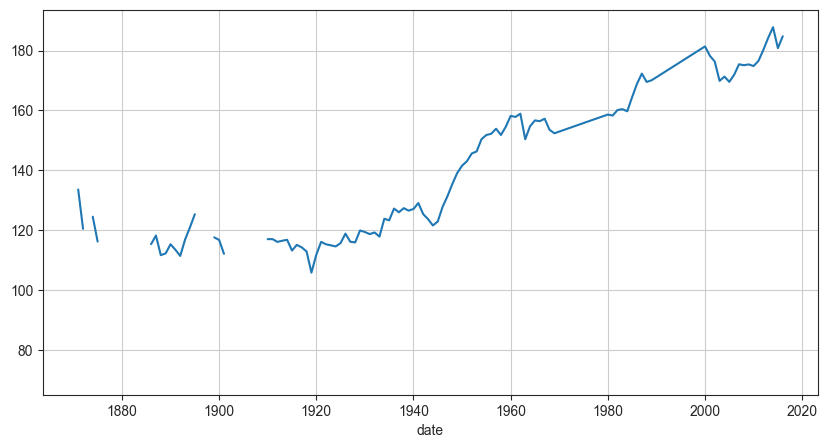

In [7]:
# 1.1. График показывает среднюю продолжительность матча за год
# из графика видно, что ранее матчи были короче 
plt.figure(figsize=(10,5))
df_1.groupby(df_1['date'].dt.year)["length_minutes"].mean().plot()

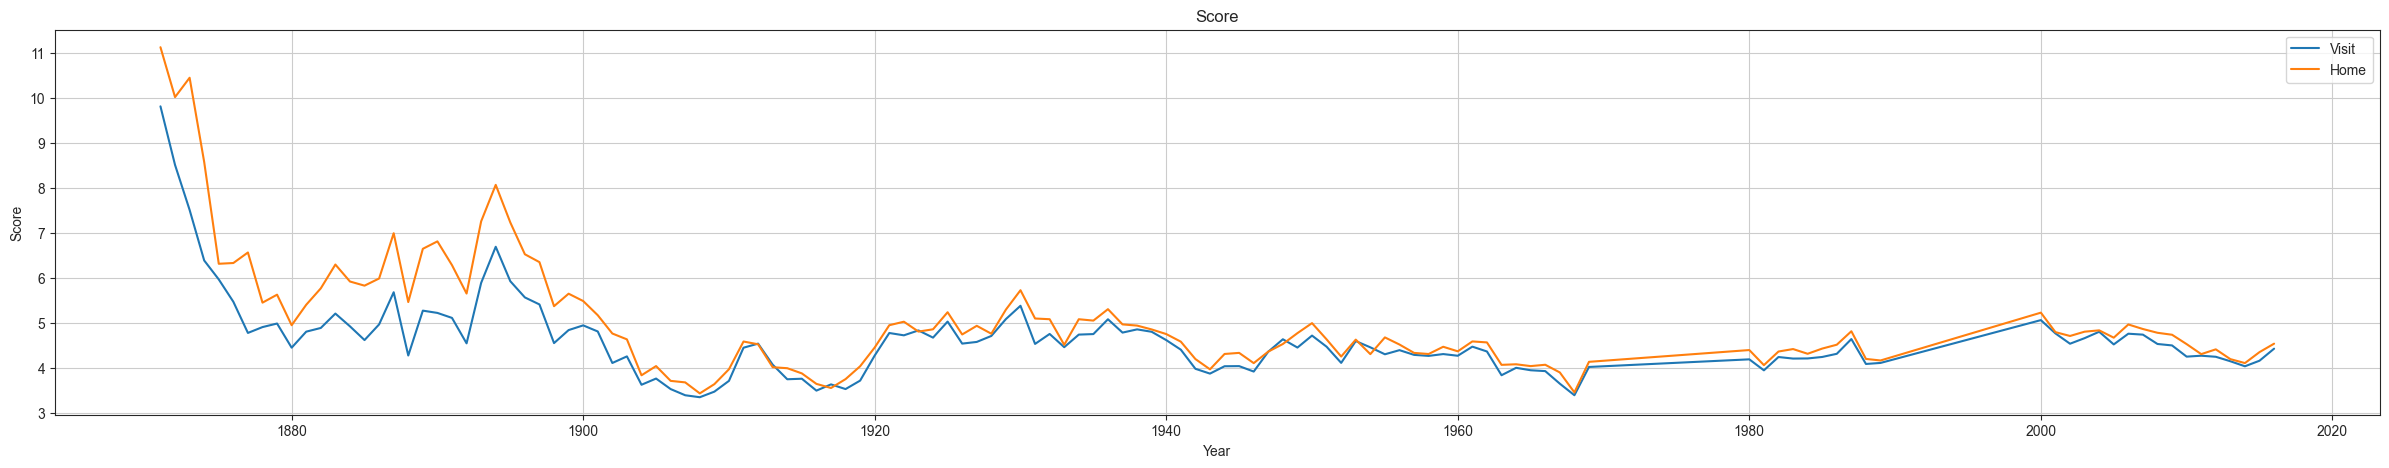

In [9]:
# 1.2. график для сравнения набранных очков за матч при игре дома (оранжевый) и в гостях (синий)
# можно отметить, что дома количество очков выше, чем в гостях
# также можно отметить, что до ~1900 годов количество очков было выше, чем сейчас
plt.figure(figsize=(30,5))
gr_obj_1 = df_1.groupby(df_1['date'].dt.year)["v_score"].mean()
gr_obj_2 = df_1.groupby(df_1['date'].dt.year)["h_score"].mean()
X_1 = gr_obj_1.index
Y_1 = gr_obj_1.values
X_2 = gr_obj_2.index
Y_2 = gr_obj_2.values
plt.plot(X_1, Y_1, label="Visit") # синий
plt.plot(X_2, Y_2, label="Home") # оранжевый
plt.title('Score')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()

<Axes: title={'center': 'Count of games in day of weeks'}, xlabel='day_of_week'>

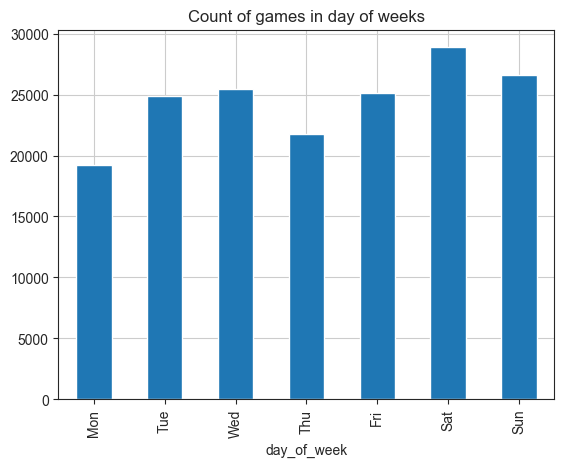

In [10]:
# 1.3. Столбчатая диаграмма, которая отображает количество матчей по дням недели
# стоит отметить, что больше всего игр было в выходной в Субботу, а меньше всего - в Понедельник
df_1['day_of_week'].value_counts()[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(kind='bar', title='Count of games in day of weeks', x='Day of week', y='Count of games')

<Axes: title={'center': 'Count of day/night matches'}, ylabel='count'>

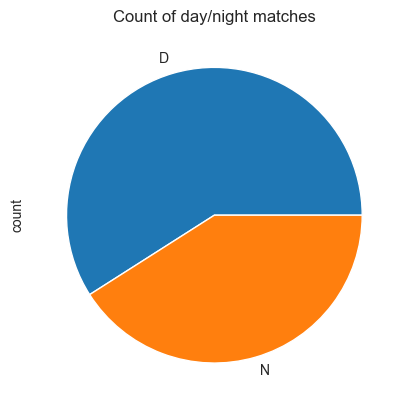

In [11]:
# 1.4. Круговая диаграмма количества дневных и ночных матчей.
df_1['day_night'].value_counts().plot(kind='pie', title='Count of day/night matches')

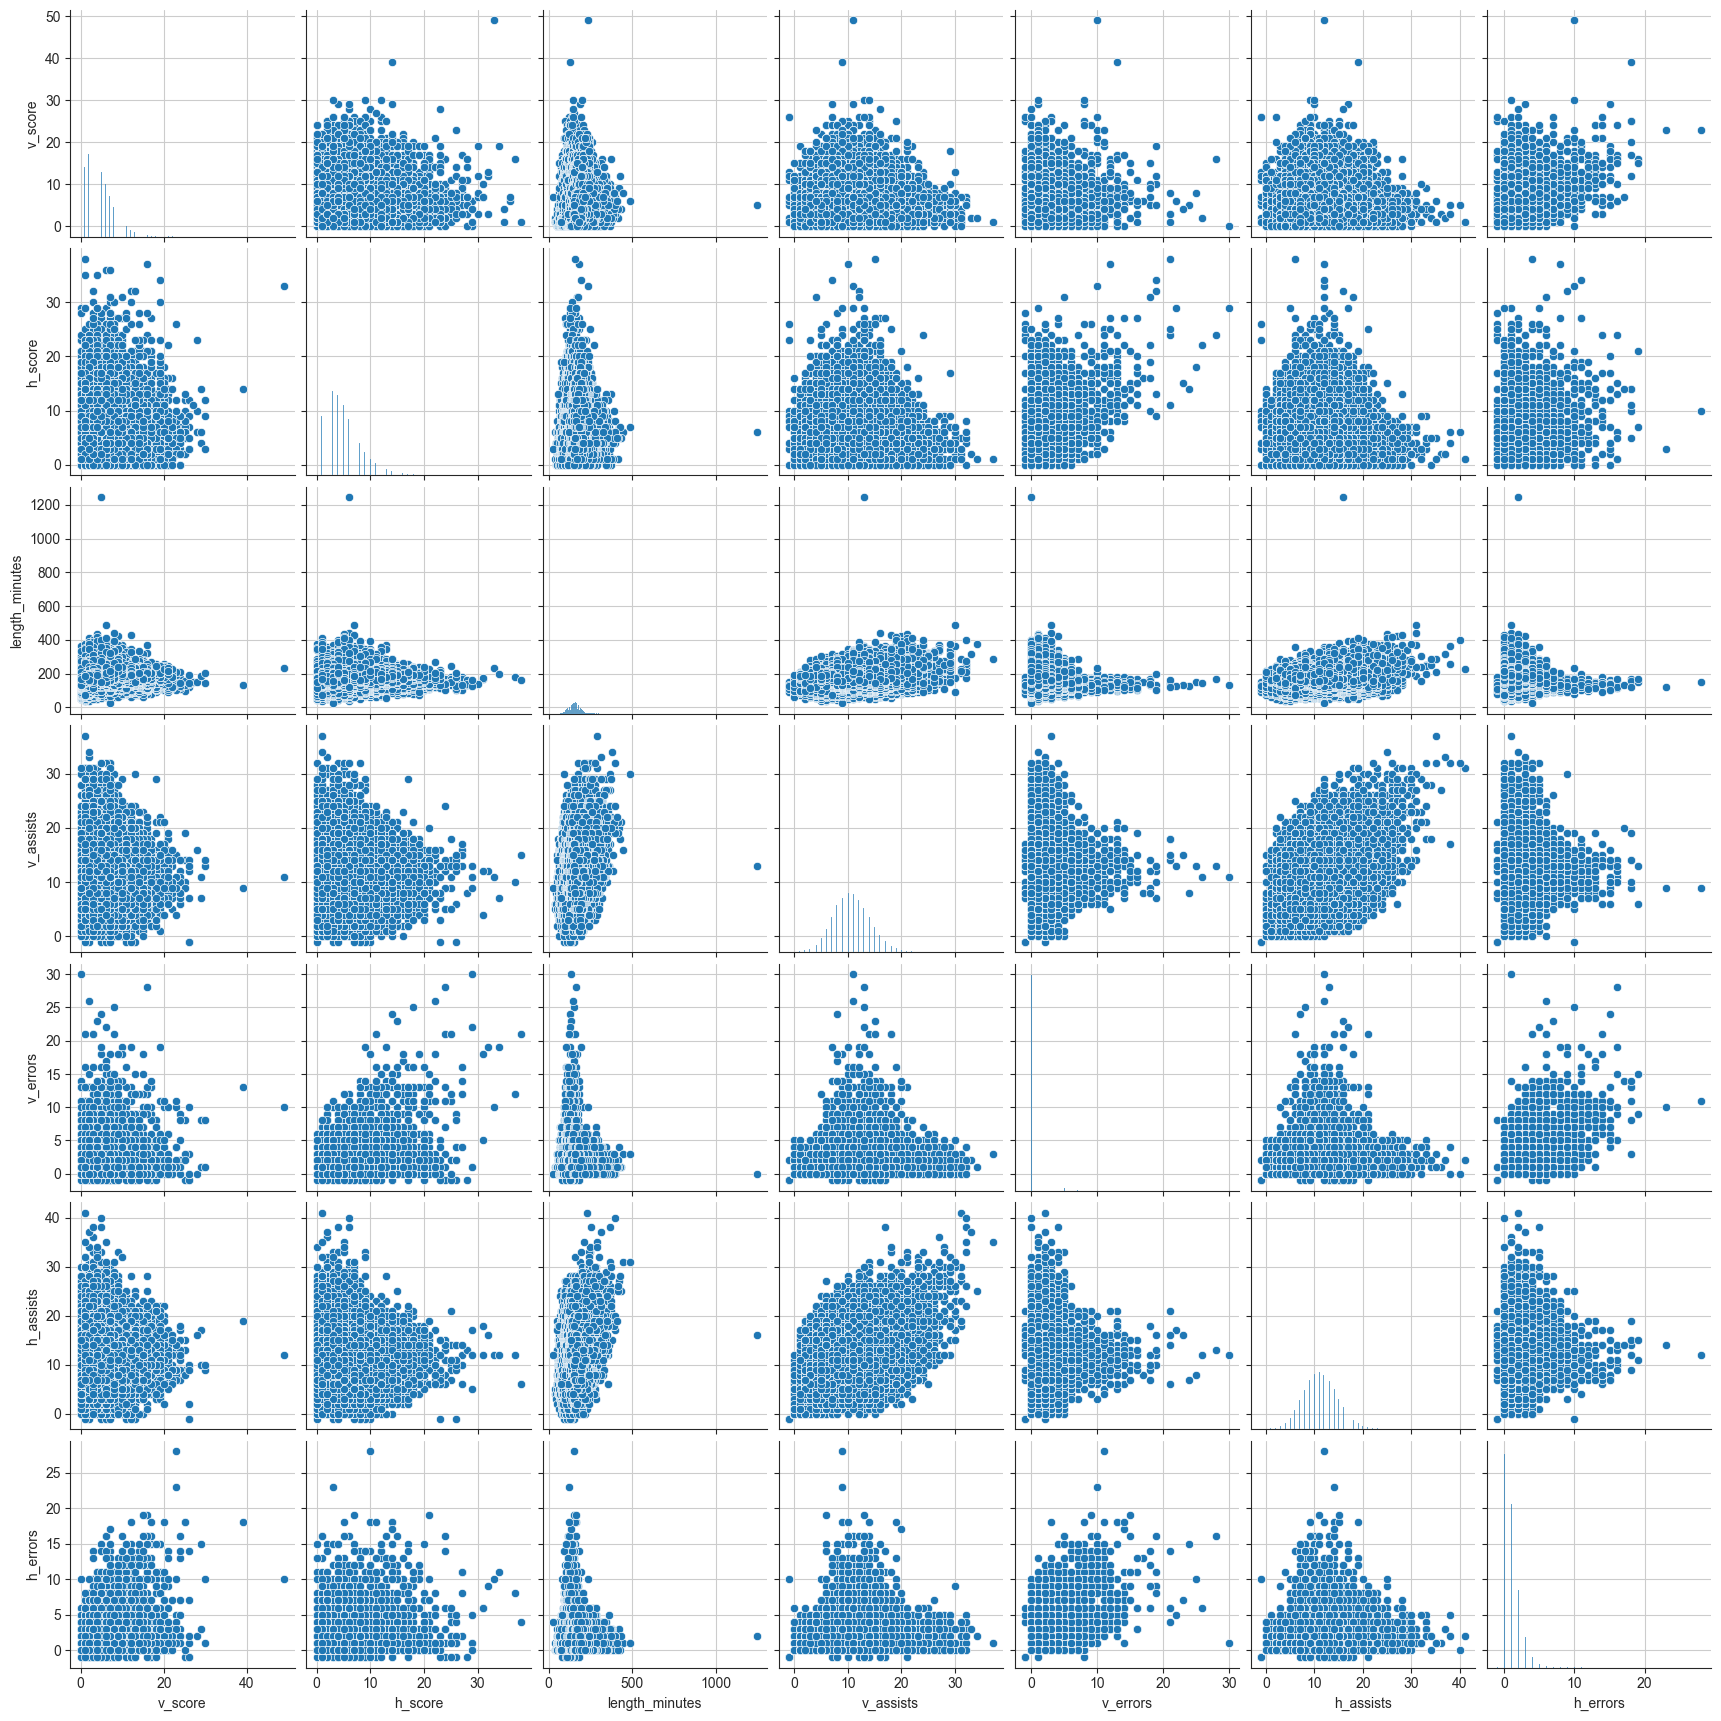

In [12]:
# 1.5. pairplot
sns.pairplot(df_1)

## Датасет 2

In [13]:
with open('./result/data2/open_opt_params.json', 'r') as f:
    dtype_2 = json.load(f)
df_2 = pd.read_csv('./data/data_2.csv', dtype=dtype_2, index_col=0)
df_2.sample(3)

msrp  isNew brandName  dealerID    vf_ABS vf_FuelTypePrimary  \
5550749  29491  False     DODGE      1579       NaN           Gasoline   
1955918  34625   True    SUBARU     36794  Standard           Gasoline   
3107128  39925   True  CHRYSLER     16846  Standard           Gasoline   

         vf_ModelYear  vf_Seats  vf_TopSpeedMPH  \
5550749        2015.0       NaN             NaN   
1955918        2019.0       5.0             NaN   
3107128        2019.0       8.0           115.0   

                             vf_TransmissionStyle  
5550749                                       NaN  
1955918  Continuously Variable Transmission (CVT)  
3107128                                       NaN

<Axes: xlabel='vf_ModelYear'>

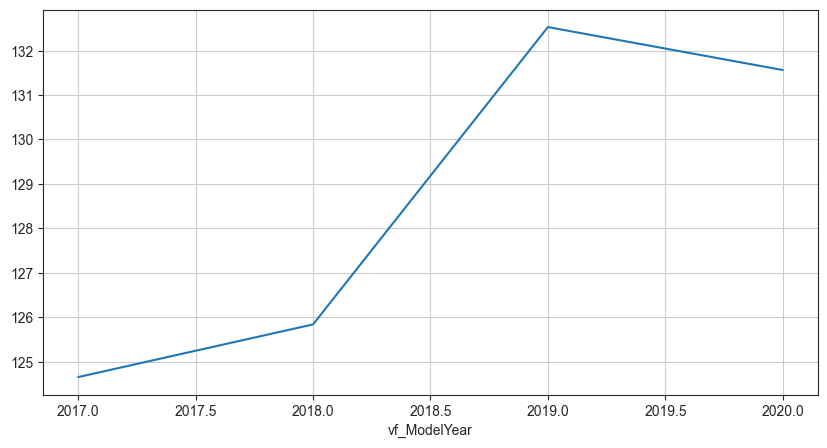

In [14]:
# 2.1. График показывает среднюю максимальную скорость автомобилей, произведённых в определённый год
# предполагал, что максимальная скорость авто должна расти со временем, в целом выглядит всё примерно так, но как-то не явно
plt.figure(figsize=(10,5))
df_2.groupby(df_2['vf_ModelYear'])["vf_TopSpeedMPH"].mean().plot()

msrp                    0.000000
isNew                   0.000000
brandName               0.000221
dealerID                0.000000
vf_ABS                  0.590756
vf_FuelTypePrimary      0.029224
vf_ModelYear            0.000225
vf_Seats                0.630543
vf_TopSpeedMPH          0.842419
vf_TransmissionStyle    0.662136
dtype: float64

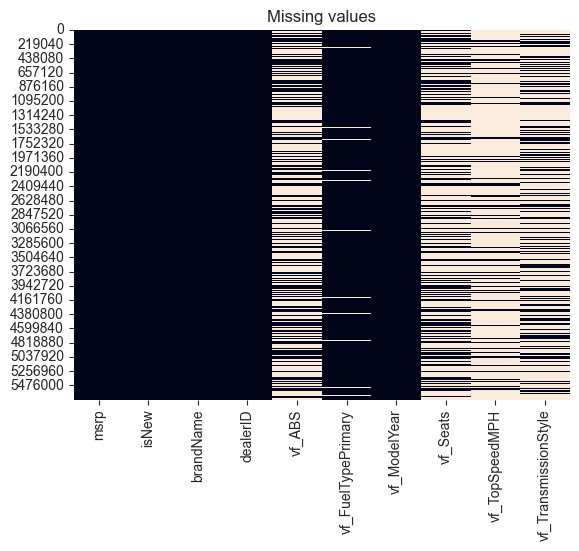

In [15]:
# 2.2. Визуальный анализ отсутствующих значений
sns.heatmap(df_2.isnull(), cbar = False).set_title("Missing values")
df_2.isnull().sum() / df_2.shape[0]

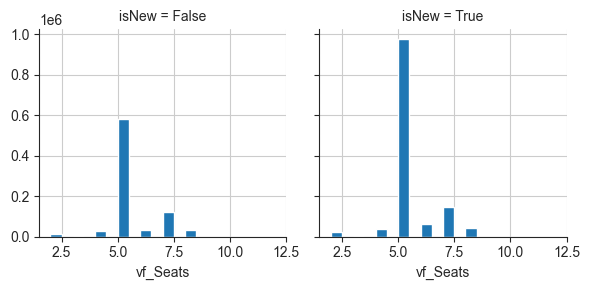

In [16]:
# 2.3. Сравнение количества новых и не невых авто по отношению к количеству сидений в них
# заметно, что количество 5местных авто преобладает, 
# но в целом видно, что все автомобили 
g = sns.FacetGrid(df_2, col='isNew')
g.map(plt.hist, 'vf_Seats', bins=20)

<Axes: xlabel='vf_ModelYear', ylabel='vf_FuelTypePrimary'>

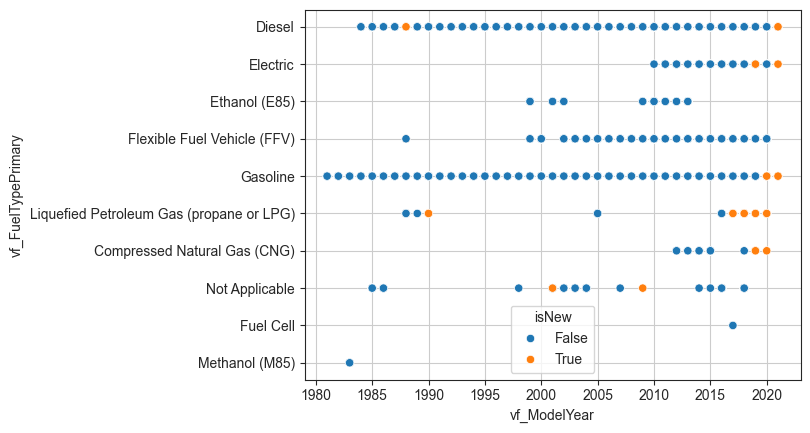

In [17]:
# 2.4 График отображает использование топливной системы в зависимости от года модели
# из графика видно, что больше дольше всего на рынке авто производятся машины на ДВС,
# к 2010 году появились электрокары
sns.scatterplot(data=df_2, x='vf_ModelYear', y='vf_FuelTypePrimary', hue="isNew")

In [ ]:
# 2.5 pairplot
sns.pairplot(df_2)

## Датасет 3

In [18]:
with open('./result/data3/open_opt_params.json', 'r') as f:
    dtype_3 = json.load(f)
df_3 = pd.read_csv('./data/data_3.csv', dtype=dtype_3, index_col=0)
df_3.sample(3)

YEAR  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
150937  2015            6      B6            EWR                 MCO   
236610  2015            5      OO            SFO                 MRY   
20496   2015            5      WN            LAS                 SLC   

        DEPARTURE_DELAY  ELAPSED_TIME  DISTANCE  ARRIVAL_DELAY  CANCELLED  
150937            -10.0         162.0       937          -21.0          0  
236610             52.0          50.0        77           57.0          0  
20496               0.0          73.0       368           -7.0          0

YEAR                   0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
DEPARTURE_DELAY        0.020169
ELAPSED_TIME           0.023321
DISTANCE               0.000000
ARRIVAL_DELAY          0.023321
CANCELLED              0.000000
dtype: float64

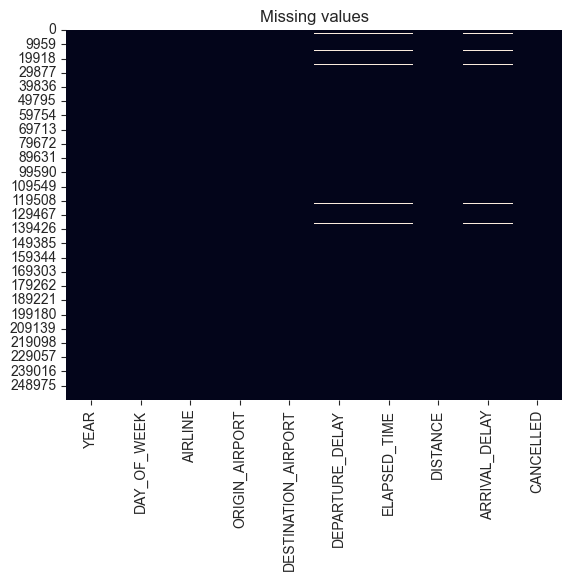

In [19]:
# 3.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_3.isnull(), cbar = False).set_title("Missing values")
df_3.isnull().sum() / df_3.shape[0]

/var/folders/mx/x97nlv2d62967tnm8jk_n_7r0000gn/T/ipykernel_14465/3305770230.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delay_by_airport = df_3.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)


<Axes: title={'center': 'DEPARTURE DELAY BY ORIGIN AIRPORT'}, xlabel='ORIGIN_AIRPORT'>

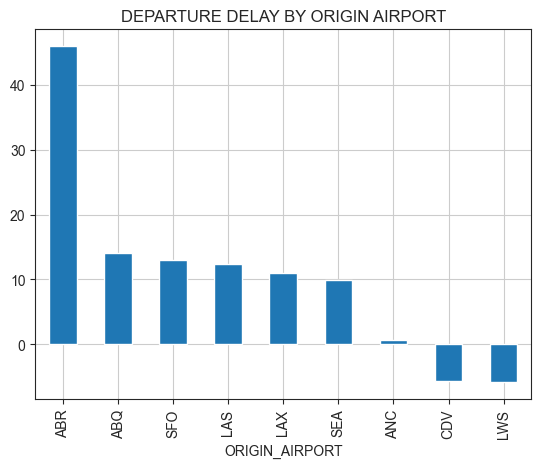

In [94]:
# 3.2. Средняя задержка по аэропорту отправления согласно списку
airport_list = ['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'CDV', 'LWS', 'ABQ', 'ABR']
mean_delay_by_airport = df_3.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
mean_delay_by_airport[mean_delay_by_airport.index.isin(airport_list)].plot(kind='bar', title='DEPARTURE DELAY BY ORIGIN AIRPORT')

<Axes: title={'center': 'Count of airlines'}, ylabel='count'>

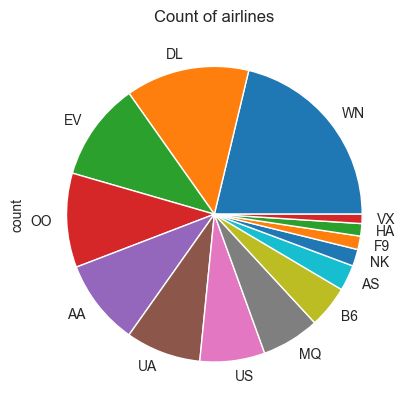

In [118]:
# 3.3. Круговая диаграмма, отображающая количество авиакомпаний по всему датасету
df_3['AIRLINE'].value_counts().plot(kind='pie', title='Count of airlines')

<Figure size 1600x2000 with 0 Axes>

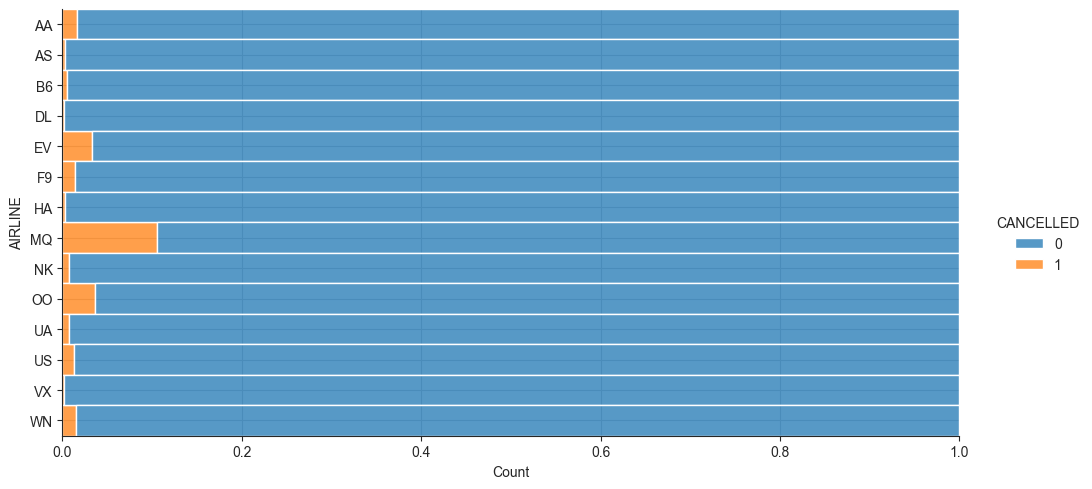

In [112]:
# 3.4. Отображение отменённых рейсов по авиакомпаниям
plt.figure(figsize=(16,20))
sns.displot(
    data=df_3,
    y="AIRLINE",
    hue="CANCELLED",
    multiple="fill",
    aspect=2,
)

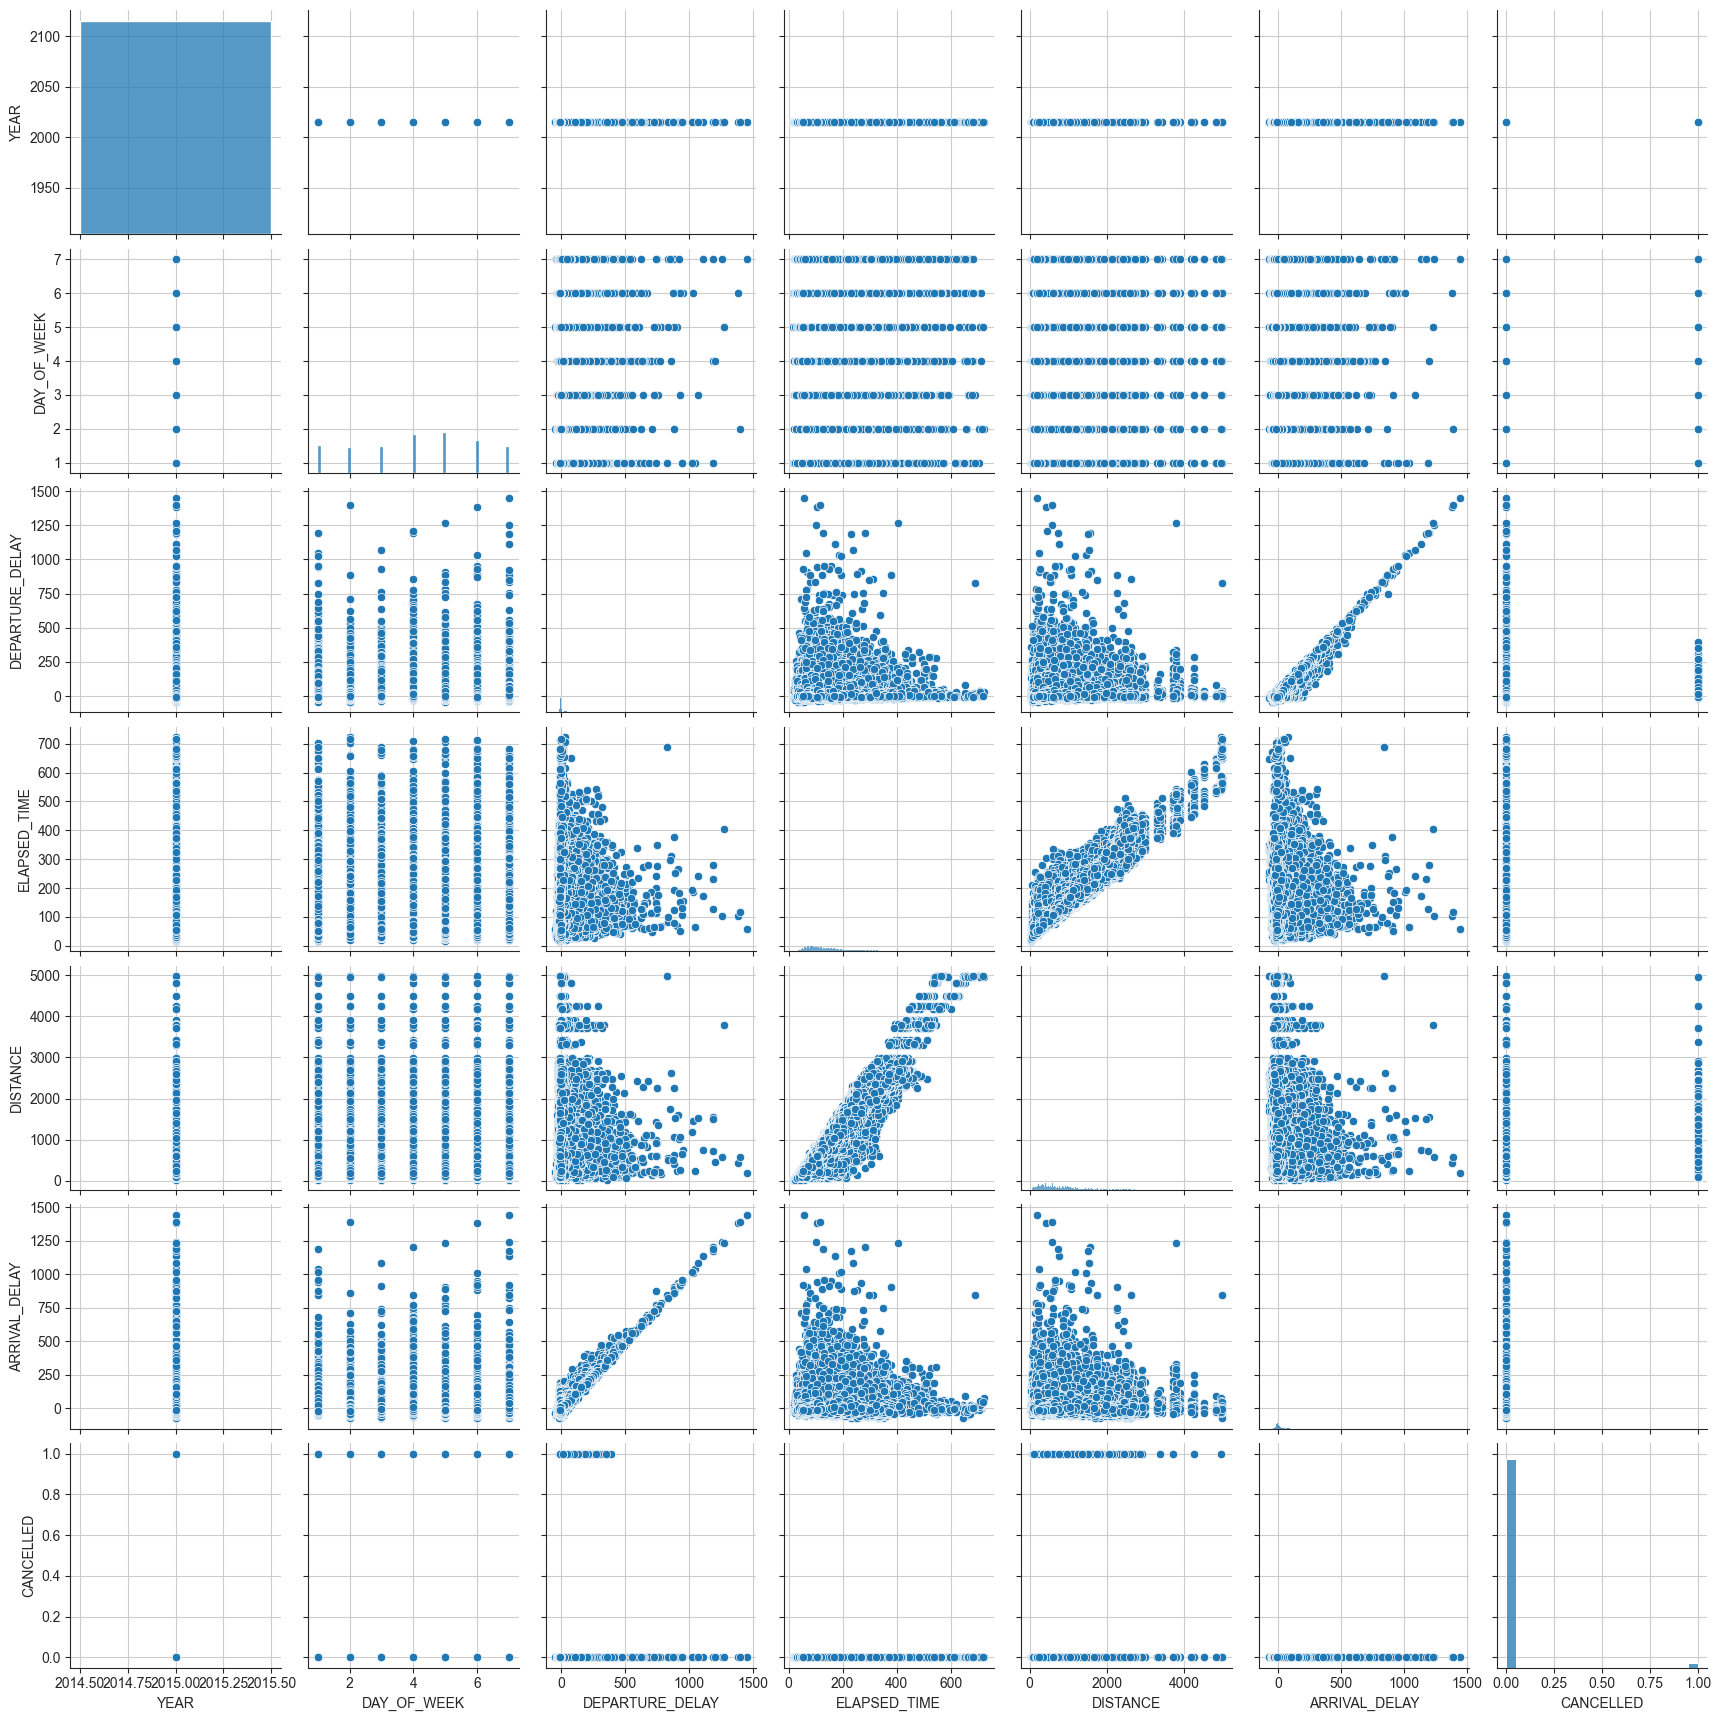

In [113]:
# 3.5. Pairplot
sns.pairplot(df_3)

## Датасет 4

In [114]:
with open('./result/data4/open_opt_params.json', 'r') as f:
    dtype_4 = json.load(f)
df_4 = pd.read_csv('./data/data_4.csv', dtype=dtype_4, index_col=0)
df_4.sample(3)

schedule_name     experience_name  accept_incomplete_resumes  \
430051    Полный день           Нет опыта                       True   
291539  Гибкий график       От 3 до 6 лет                      False   
375725    Полный день  От 1 года до 3 лет                      False   

                employer_name  salary_from  salary_to  archived  \
430051                 Тензор      41500.0        NaN      True   
291539  Компания ТрансТелеКом     140000.0        NaN      True   
375725          Информконтакт      50000.0        NaN      True   

            area_name prof_classes_found  
430051  Нижневартовск          prodajnik  
291539         Москва         programmer  
375725    Альметьевск         specialist

In [115]:
df_4.describe(include='all')

schedule_name     experience_name accept_incomplete_resumes  \
count         587637              587637                    587637   
unique             5                   4                         2   
top      Полный день  От 1 года до 3 лет                     False   
freq          450230              300768                    519795   
mean             NaN                 NaN                       NaN   
std              NaN                 NaN                       NaN   
min              NaN                 NaN                       NaN   
25%              NaN                 NaN                       NaN   
50%              NaN                 NaN                       NaN   
75%              NaN                 NaN                       NaN   
max              NaN                 NaN                       NaN   

       employer_name   salary_from     salary_to archived area_name  \
count         587637  2.587410e+05  1.645090e+05   587637    587637   
unique         60045           NaN           NaN        2      2837   
top           Яндекс           NaN           NaN     True    Москва   
freq           11160           NaN           NaN   485016    181183   
mean             NaN  7.698085e+04  1.194115e+05      NaN       NaN   
std              NaN  3.348555e+05  5.275156e+05      NaN       NaN   
min              NaN  1.000000e+00  1.000000e+00      NaN       NaN   
25%              NaN  3.000000e+04  4.000000e+04      NaN       NaN   
50%              NaN  4.500000e+04  7.000000e+04      NaN       NaN   
75%              NaN  8.000000e+04  1.200000e+05      NaN       NaN   
max              NaN  2.000000e+07  3.000000e+07      NaN       NaN   

       prof_classes_found  
count              576794  
unique                919  
top            programmer  
freq               151701  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN

schedule_name                0.000000
experience_name              0.000000
accept_incomplete_resumes    0.000000
employer_name                0.000000
salary_from                  0.559692
salary_to                    0.720050
archived                     0.000000
area_name                    0.000000
prof_classes_found           0.018452
dtype: float64

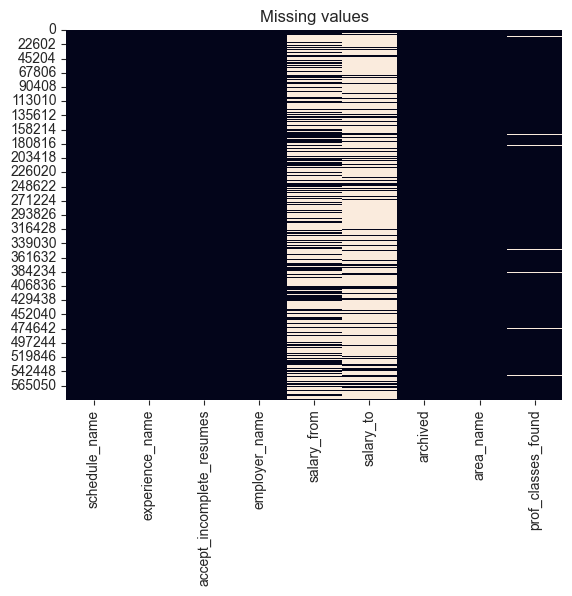

In [117]:
# 4.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_4.isnull(), cbar = False).set_title("Missing values")
df_4.isnull().sum() / df_4.shape[0]

<Axes: title={'center': 'Count of schedule_name'}, ylabel='count'>

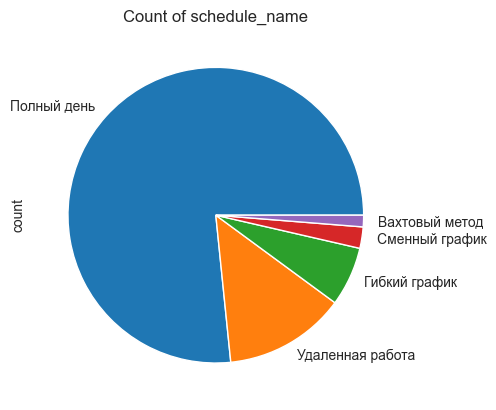

In [119]:
# 4.2. Круговая диаграмма, отображающая количество вакансий в зависимости от условий занятости
df_4['schedule_name'].value_counts().plot(kind='pie', title='Count of schedule_name')

/var/folders/mx/x97nlv2d62967tnm8jk_n_7r0000gn/T/ipykernel_14465/378571684.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df_4.groupby(['experience_name', 'archived'], as_index=False)['salary_from'].mean(),


<Axes: xlabel='experience_name', ylabel='salary_from'>

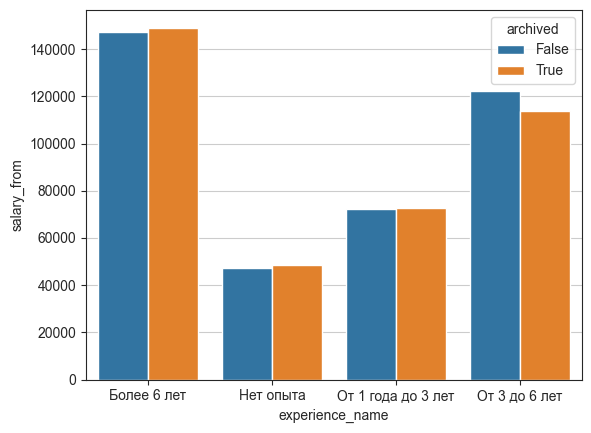

In [134]:
# 4.3 Средняя зп в зависимости от опыта работы
sns.barplot(df_4.groupby(['experience_name', 'archived'], as_index=False)['salary_from'].mean(), 
            hue='archived', 
            x='experience_name', 
            y='salary_from')

<Figure size 1600x2000 with 0 Axes>

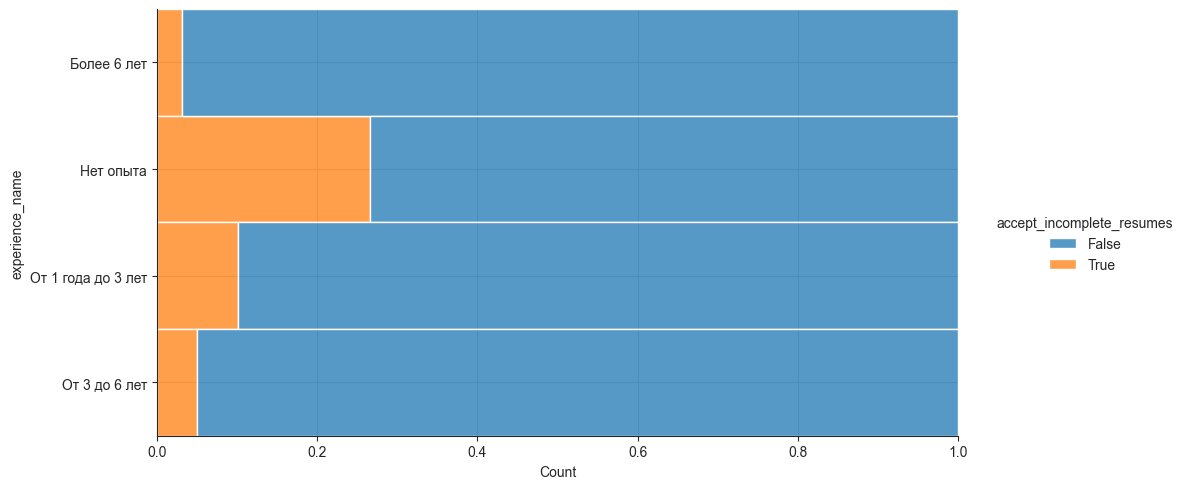

In [136]:
plt.figure(figsize=(16,20))
sns.displot(
    data=df_4,
    y="experience_name",
    hue="accept_incomplete_resumes",
    multiple="fill",
    aspect=2,
)
# accept_incomplete_resumes

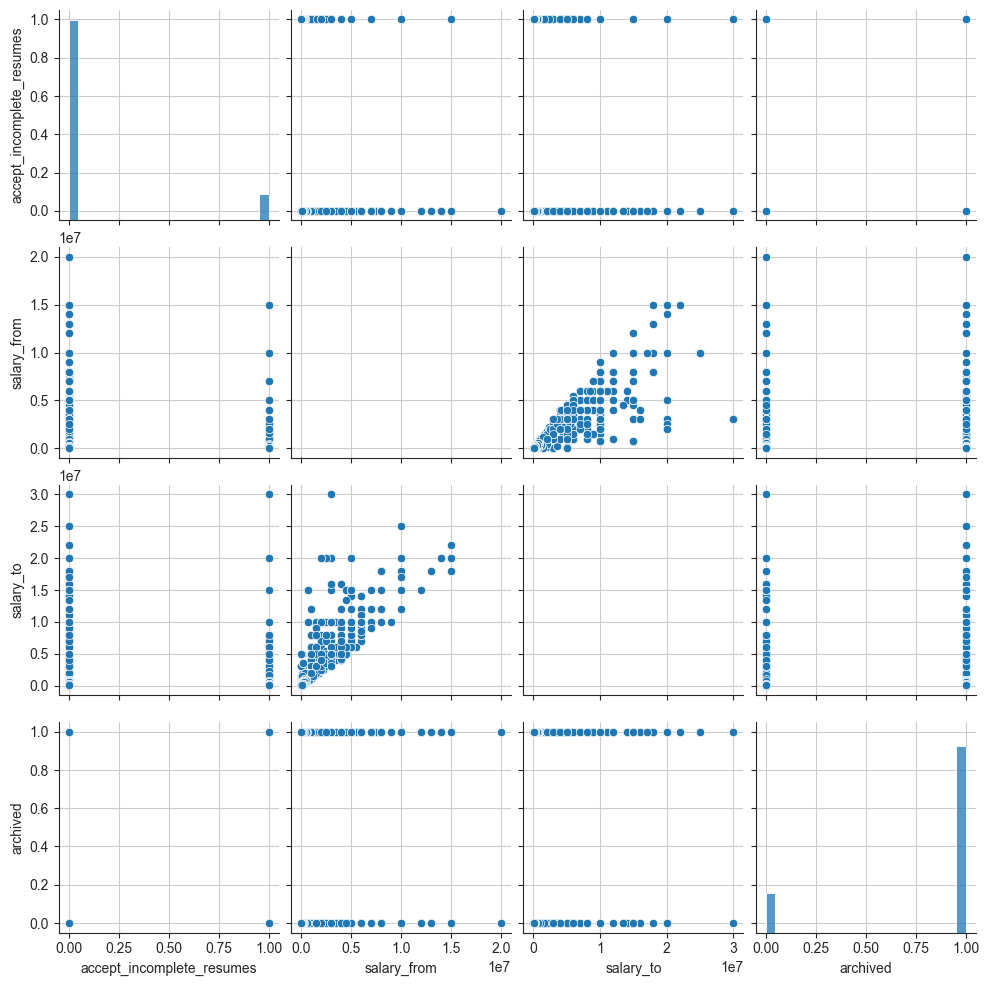

In [120]:
# 4.5. Pairplot
sns.pairplot(df_4)

## Датасет 5

In [137]:
with open('./result/data5/open_opt_params.json', 'r') as f:
    dtype_5 = json.load(f)
df_5 = pd.read_csv('./data/data_5.csv', dtype=dtype_5, index_col=0)
df_5.sample(3)

name neo          H  diameter orbit_id          om           w  \
906532  NaN   N  17.368999       NaN        5  242.342621  205.886597   
348412  NaN   N  18.200001       NaN   JPL 13  100.378906  274.916992   
165153  NaN   N  17.000000       NaN   JPL 15  339.125671    4.072916   

            moid class      rms  
906532  1.438200   MBA  0.44256  
348412  0.868813   MBA  0.65036  
165153  0.852041   MBA  0.59555

In [138]:
df_5.describe(include='all')

name     neo              H       diameter orbit_id             om  \
count     22064  958520  952261.000000  136209.000000   958524  958524.000000   
unique    22064       2            NaN            NaN     4690            NaN   
top     A'Hearn       N            NaN            NaN        1            NaN   
freq          1  935625            NaN            NaN    50142            NaN   
mean        NaN     NaN      16.906412       5.506429      NaN     168.456421   
std         NaN     NaN       1.790405       9.425164      NaN     102.881706   
min         NaN     NaN      -1.100000       0.002500      NaN       0.000025   
25%         NaN     NaN      16.100000       2.780000      NaN      80.604401   
50%         NaN     NaN      16.900000       3.972000      NaN     159.826920   
75%         NaN     NaN      17.714001       5.765000      NaN     252.247757   
max         NaN     NaN      33.200001     939.400024      NaN     359.999786   

                    w          moid   class            rms  
count   958524.000000  9.386030e+05  958524  958522.000000  
unique            NaN           NaN      13            NaN  
top               NaN           NaN     MBA            NaN  
freq              NaN           NaN  855954            NaN  
mean       181.369446  1.415162e+00     NaN       0.561153  
std        103.887993  2.156731e+00     NaN       2.745700  
min          0.000130  4.544120e-07     NaN       0.000000  
25%         91.482061  9.797020e-01     NaN       0.518040  
50%        182.358078  1.240850e+00     NaN       0.566280  
75%        271.521591  1.593370e+00     NaN       0.613927  
max        359.999634  7.947660e+01     NaN    2686.600098

name        1.593603
neo         0.000007
H           0.010658
diameter    1.399359
orbit_id    0.000000
om          0.000000
w           0.000000
moid        0.033900
class       0.000000
rms         0.000003
dtype: float64

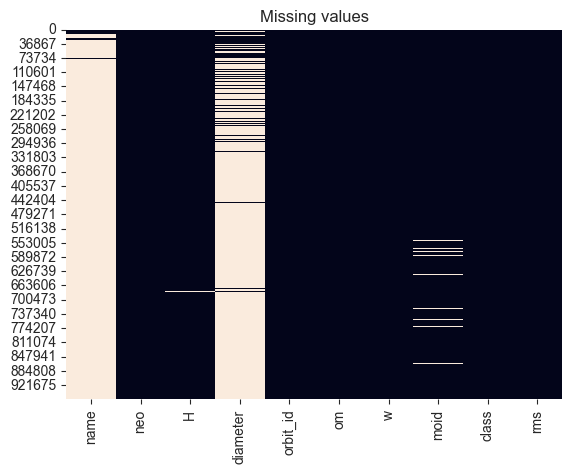

In [139]:
# 5.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_5.isnull(), cbar = False).set_title("Missing values")
df_5.isnull().sum() / df_4.shape[0]

/var/folders/mx/x97nlv2d62967tnm8jk_n_7r0000gn/T/ipykernel_14465/1528226850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df_5.groupby(['class'], as_index=False)['H'].mean(),


<Axes: xlabel='class', ylabel='H'>

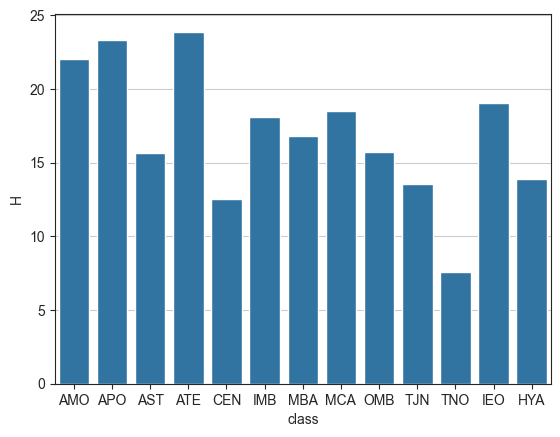

In [146]:
# 5.2 Средняя H в зависимости от class
sns.barplot(df_5.groupby(['class'], as_index=False)['H'].mean(), 
            x='class', 
            y='H')

In [151]:
df_5[df_5['rms'] == 2686.600098]

name neo          H  diameter orbit_id          om        w      moid  \
957691  NaN   Y  27.846001       NaN    JPL 3  158.901993  284.987  0.008841   

       class          rms  
957691   APO  2686.600098

<Axes: xlabel='rms', ylabel='om'>

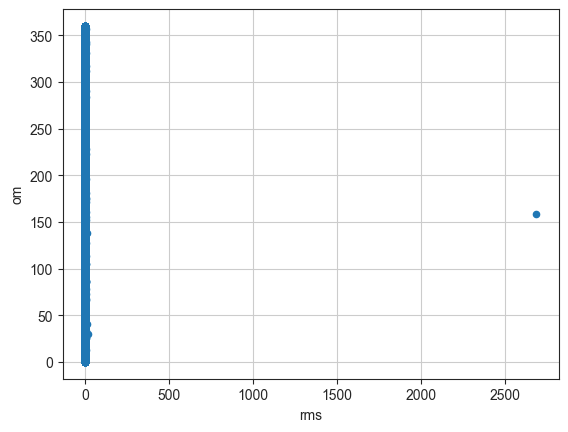

In [153]:
# 5.3. Замечен всплеск
df_5.plot.scatter(x='rms', y='om')

<Axes: xlabel='rms', ylabel='om'>

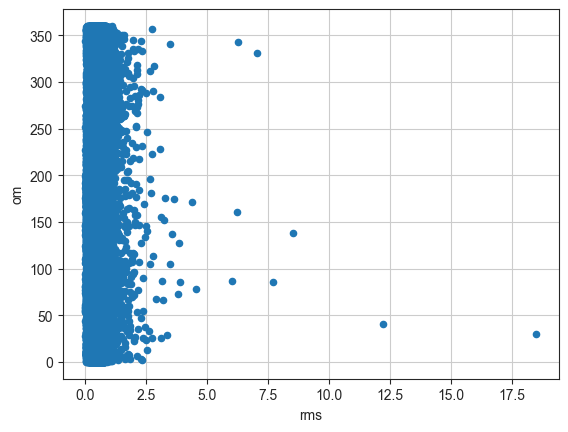

In [154]:
# 5.4. Всплеска нет
df_5.drop(957691).plot.scatter(x='rms', y='om')

In [140]:
# 5.5. Pairplot
# sns.pairplot(df_5) # долго крутит